In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logistic(r,x):
    return r*x*(1-x)

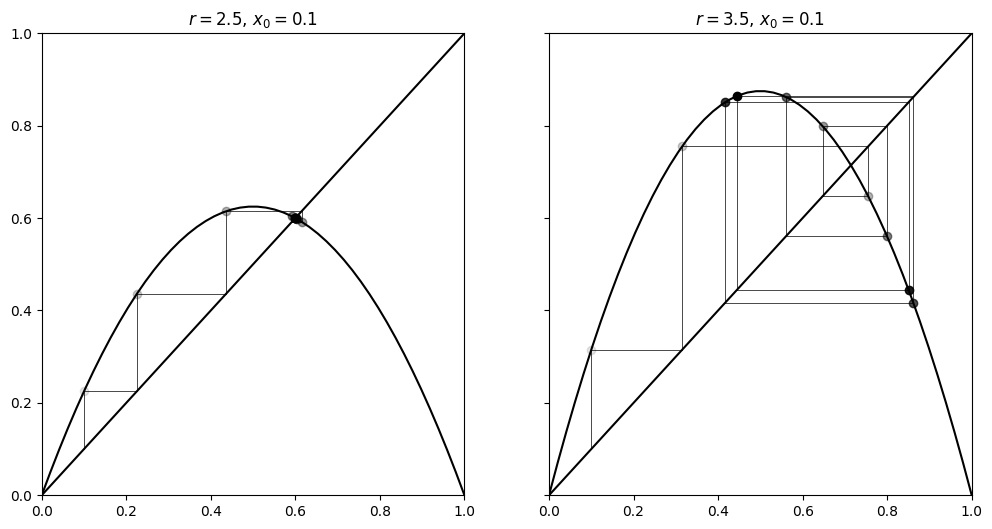

In [11]:
## Plot Return Map with Cobweb
def plot_system(r, x0, n, ax=None):
    # Plot function and y=x diag. line
    t = np.linspace(0,1)
    ax.plot(t, logistic(r,t), 'k') # curve
    ax.plot([0,1],[0,1], 'k') # line

    # Recursively apply y=f(x). <-equal to-> x_n+1 = f(x_n)
    # (x,x) -> (x,y) from line to curve
    # (x,y) -> (y,y) from curve to line to set x_n = x_n+1
    x=x0
    for i in range(n):
        y = logistic(r, x)

        # plot transient path lines
        ax.plot([x,x], [x,y], 'k', linewidth=0.5)
        ax.plot([x,y], [y,y], 'k', linewidth=0.5)

        # plot points of intersection
        ax.plot([x],[y],'ok', alpha=(i+1)/n)
        
        # set x_n = x_n+1
        x=y
        
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$") 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)
plt.show()


In [20]:
## Select and initialize values for Bifurcation Plot ##
rmin=2.4
rmax=4.0
n=10000 #values of r to simulate

r = np.linspace(rmin, rmax, n) # build r array

iterations=1000 # how many iterates 
k = 100 # plot points for last k iterations

x0=1e-5*np.ones(n)

lyapunov = np.zeros(n)

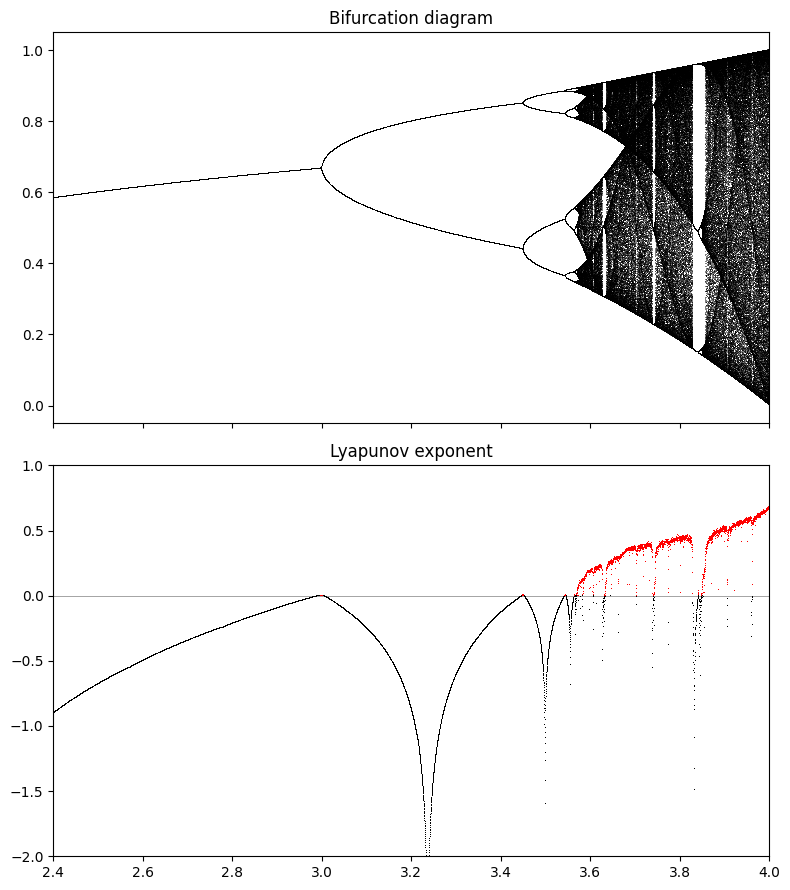

In [21]:
## plot bifurcation and lyapunov diagrams ##
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)

x=x0

# bifurcation
for i in range(iterations):
    x=logistic(r, x)
    lyapunov += np.log(abs(r - 2 * r * x))

    # plot final points to see asymptomatic behavior
    if i > iterations-k: 
        ax1.plot(r, x ,',k', alpha=0.5)

ax1.set_xlim(rmin, rmax)
ax1.set_title("Bifurcation diagram")

ax2.axhline(0,color='k', linewidth=0.5, alpha=0.5)


ax2.plot(r[lyapunov<0], lyapunov[lyapunov<0]/iterations, ',k')
ax2.plot(r[lyapunov>=0], lyapunov[lyapunov>=0]/iterations, ',r')

ax2.set_xlim(rmin, rmax)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()
plt.show()